In [2]:
# To enable plotting graphs in Jupyter notebook
%matplotlib inline 

In [3]:
import pandas as pd
import numpy as np
# Import Linear Regression machine learning library
from sklearn.linear_model import LinearRegression


In [11]:
car_df = pd.read_csv("CarPrice_Assignment.csv")

In [18]:
# useing transpose tp see the fisrt 2 rows because the columns are large
car_df.head(20).transpose()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
car_ID,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
symboling,3,3,1,2,2,2,1,1,1,0,2,0,0,0,1,0,0,0,2,1
wheelbase,88.6,88.6,94.5,99.8,99.4,99.8,105.8,105.8,105.8,99.5,101.2,101.2,101.2,101.2,103.5,103.5,103.5,110.0,88.4,94.5
carlength,168.8,168.8,171.2,176.6,176.6,177.3,192.7,192.7,192.7,178.2,176.8,176.8,176.8,176.8,189.0,189.0,193.8,197.0,141.1,155.9
carwidth,64.1,64.1,65.5,66.2,66.4,66.3,71.4,71.4,71.4,67.9,64.8,64.8,64.8,64.8,66.9,66.9,67.9,70.9,60.3,63.6
carheight,48.8,48.8,52.4,54.3,54.3,53.1,55.7,55.7,55.9,52.0,54.3,54.3,54.3,54.3,55.7,55.7,53.7,56.3,53.2,52.0
curbweight,2548,2548,2823,2337,2824,2507,2844,2954,3086,3053,2395,2395,2710,2765,3055,3230,3380,3505,1488,1874
cylindernumber,four,four,six,four,five,five,five,five,five,five,four,four,six,six,six,six,six,six,three,four
enginesize,130,130,152,109,136,136,136,136,131,131,108,108,164,164,164,209,209,209,61,90
boreratio,3.47,3.47,2.68,3.19,3.19,3.19,3.19,3.19,3.13,3.13,3.5,3.5,3.31,3.31,3.31,3.62,3.62,3.62,2.91,3.03


In [13]:
car_df.dtypes

car_ID                int64
symboling             int64
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

In [14]:
car_df = car_df.drop('CarName', axis=1)  # dropping CarName here just to follow the video but in real project , may separate data based on CarName. 
#The different CarNames in same data set may not be a good idea. Added axis=1 to indicate column; 0 if i want row
#dropping str(object) data type besauce Ml alogrothms can't work with str(object).
# Also the dropped columns have low frequency count or have 1 frequency count ie low variance 
# dropping following columns due to low variance filter. i.e an attribute which is mostly one type of data is not a good dimension
car_df = car_df.drop('fueltype', axis=1)
car_df = car_df.drop('enginelocation', axis=1)
car_df = car_df.drop('doornumber', axis=1) 
car_df = car_df.drop('carbody', axis=1)
car_df = car_df.drop('drivewheel', axis=1)
car_df = car_df.drop('enginetype', axis=1) # need more info on this column
car_df = car_df.drop('fuelsystem', axis=1)
car_df = car_df.drop('aspiration', axis=1)


In [15]:
# Check the structure of the dataframe after dropping the unwanted columns
car_df.dtypes

car_ID                int64
symboling             int64
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
cylindernumber       object
enginesize            int64
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

In [19]:
# Replace the string numbers into numerical values for number of cylinders
car_df['cylinder'] = car_df['cylindernumber'].replace({'one': 1, 'two': 2, 'three': 3, 'four': 4, 'five':5, 'six': 6, 'seven': 7, 'eight': 8, 'nine': 9, 'ten': 10, 'eleven': 11, 'twelve': 12})

In [20]:
car_df = car_df.replace('?', np.nan)  #replace ? with NA which is equivalent of NULL
#car_df[car_df.isnull().any(axis=1)]  # display records with 'NA' 

# Change the attribute types from object to float type (generic numeric types) 

car_df['citympg'] = car_df['citympg'].astype('float64')
car_df['highwaympg']= car_df['highwaympg'].astype('float64')
car_df['horsepower']= car_df['horsepower'].astype('float64')
car_df['peakrpm']= car_df['peakrpm'].astype('float64')
car_df['price'] = car_df['price'].astype('float64')

#car_df['cylinder']= car_df['cylinder'].astype('int64')  # not required 
#car_df['normalized_losses']= car_df['normalized_losses'].astype('float64')

# fill up NaN in numeric columns with median values of those columns respectively
car_df['price'] = car_df['price'].fillna(car_df['price'].median())
car_df['boreratio']= car_df['boreratio'].fillna(car_df['boreratio'].median())
car_df['horsepower'] = car_df['horsepower'].fillna(car_df['horsepower'].median())
car_df['peakrpm'] = car_df['peakrpm'].fillna(car_df['peakrpm'].median())
car_df['stroke'] = car_df['stroke'].fillna(car_df['stroke'].median())
car_df['cylinder'] = car_df['cylinder'].fillna(car_df['cylinder'].median())

In [21]:
car_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
car_ID,205.0,103.000000,59.322565,1.00,52.00,103.00,154.00,205.00
symboling,205.0,0.834146,1.245307,-2.00,0.00,1.00,2.00,3.00
wheelbase,205.0,98.756585,6.021776,86.60,94.50,97.00,102.40,120.90
carlength,205.0,174.049268,12.337289,141.10,166.30,173.20,183.10,208.10
carwidth,205.0,65.907805,2.145204,60.30,64.10,65.50,66.90,72.30
carheight,205.0,53.724878,2.443522,47.80,52.00,54.10,55.50,59.80
curbweight,205.0,2555.565854,520.680204,1488.00,2145.00,2414.00,2935.00,4066.00
enginesize,205.0,126.907317,41.642693,61.00,97.00,120.00,141.00,326.00
boreratio,205.0,3.329756,0.270844,2.54,3.15,3.31,3.58,3.94
stroke,205.0,3.255415,0.313597,2.07,3.11,3.29,3.41,4.17


In [35]:
car_df.head(10)

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,cylinder
0,1,3,88.6,168.8,64.1,48.8,2548,four,130,3.47,2.68,9.0,111.0,5000.0,21,27,13495.000,4
1,2,3,88.6,168.8,64.1,48.8,2548,four,130,3.47,2.68,9.0,111.0,5000.0,21,27,16500.000,4
2,3,1,94.5,171.2,65.5,52.4,2823,six,152,2.68,3.47,9.0,154.0,5000.0,19,26,16500.000,6
3,4,2,99.8,176.6,66.2,54.3,2337,four,109,3.19,3.40,10.0,102.0,5500.0,24,30,13950.000,4
4,5,2,99.4,176.6,66.4,54.3,2824,five,136,3.19,3.40,8.0,115.0,5500.0,18,22,17450.000,5
5,6,2,99.8,177.3,66.3,53.1,2507,five,136,3.19,3.40,8.5,110.0,5500.0,19,25,15250.000,5
6,7,1,105.8,192.7,71.4,55.7,2844,five,136,3.19,3.40,8.5,110.0,5500.0,19,25,17710.000,5
7,8,1,105.8,192.7,71.4,55.7,2954,five,136,3.19,3.40,8.5,110.0,5500.0,19,25,18920.000,5
8,9,1,105.8,192.7,71.4,55.9,3086,five,131,3.13,3.40,8.3,140.0,5500.0,17,20,23875.000,5
9,10,0,99.5,178.2,67.9,52.0,3053,five,131,3.13,3.40,7.0,160.0,5500.0,16,22,17859.167,5


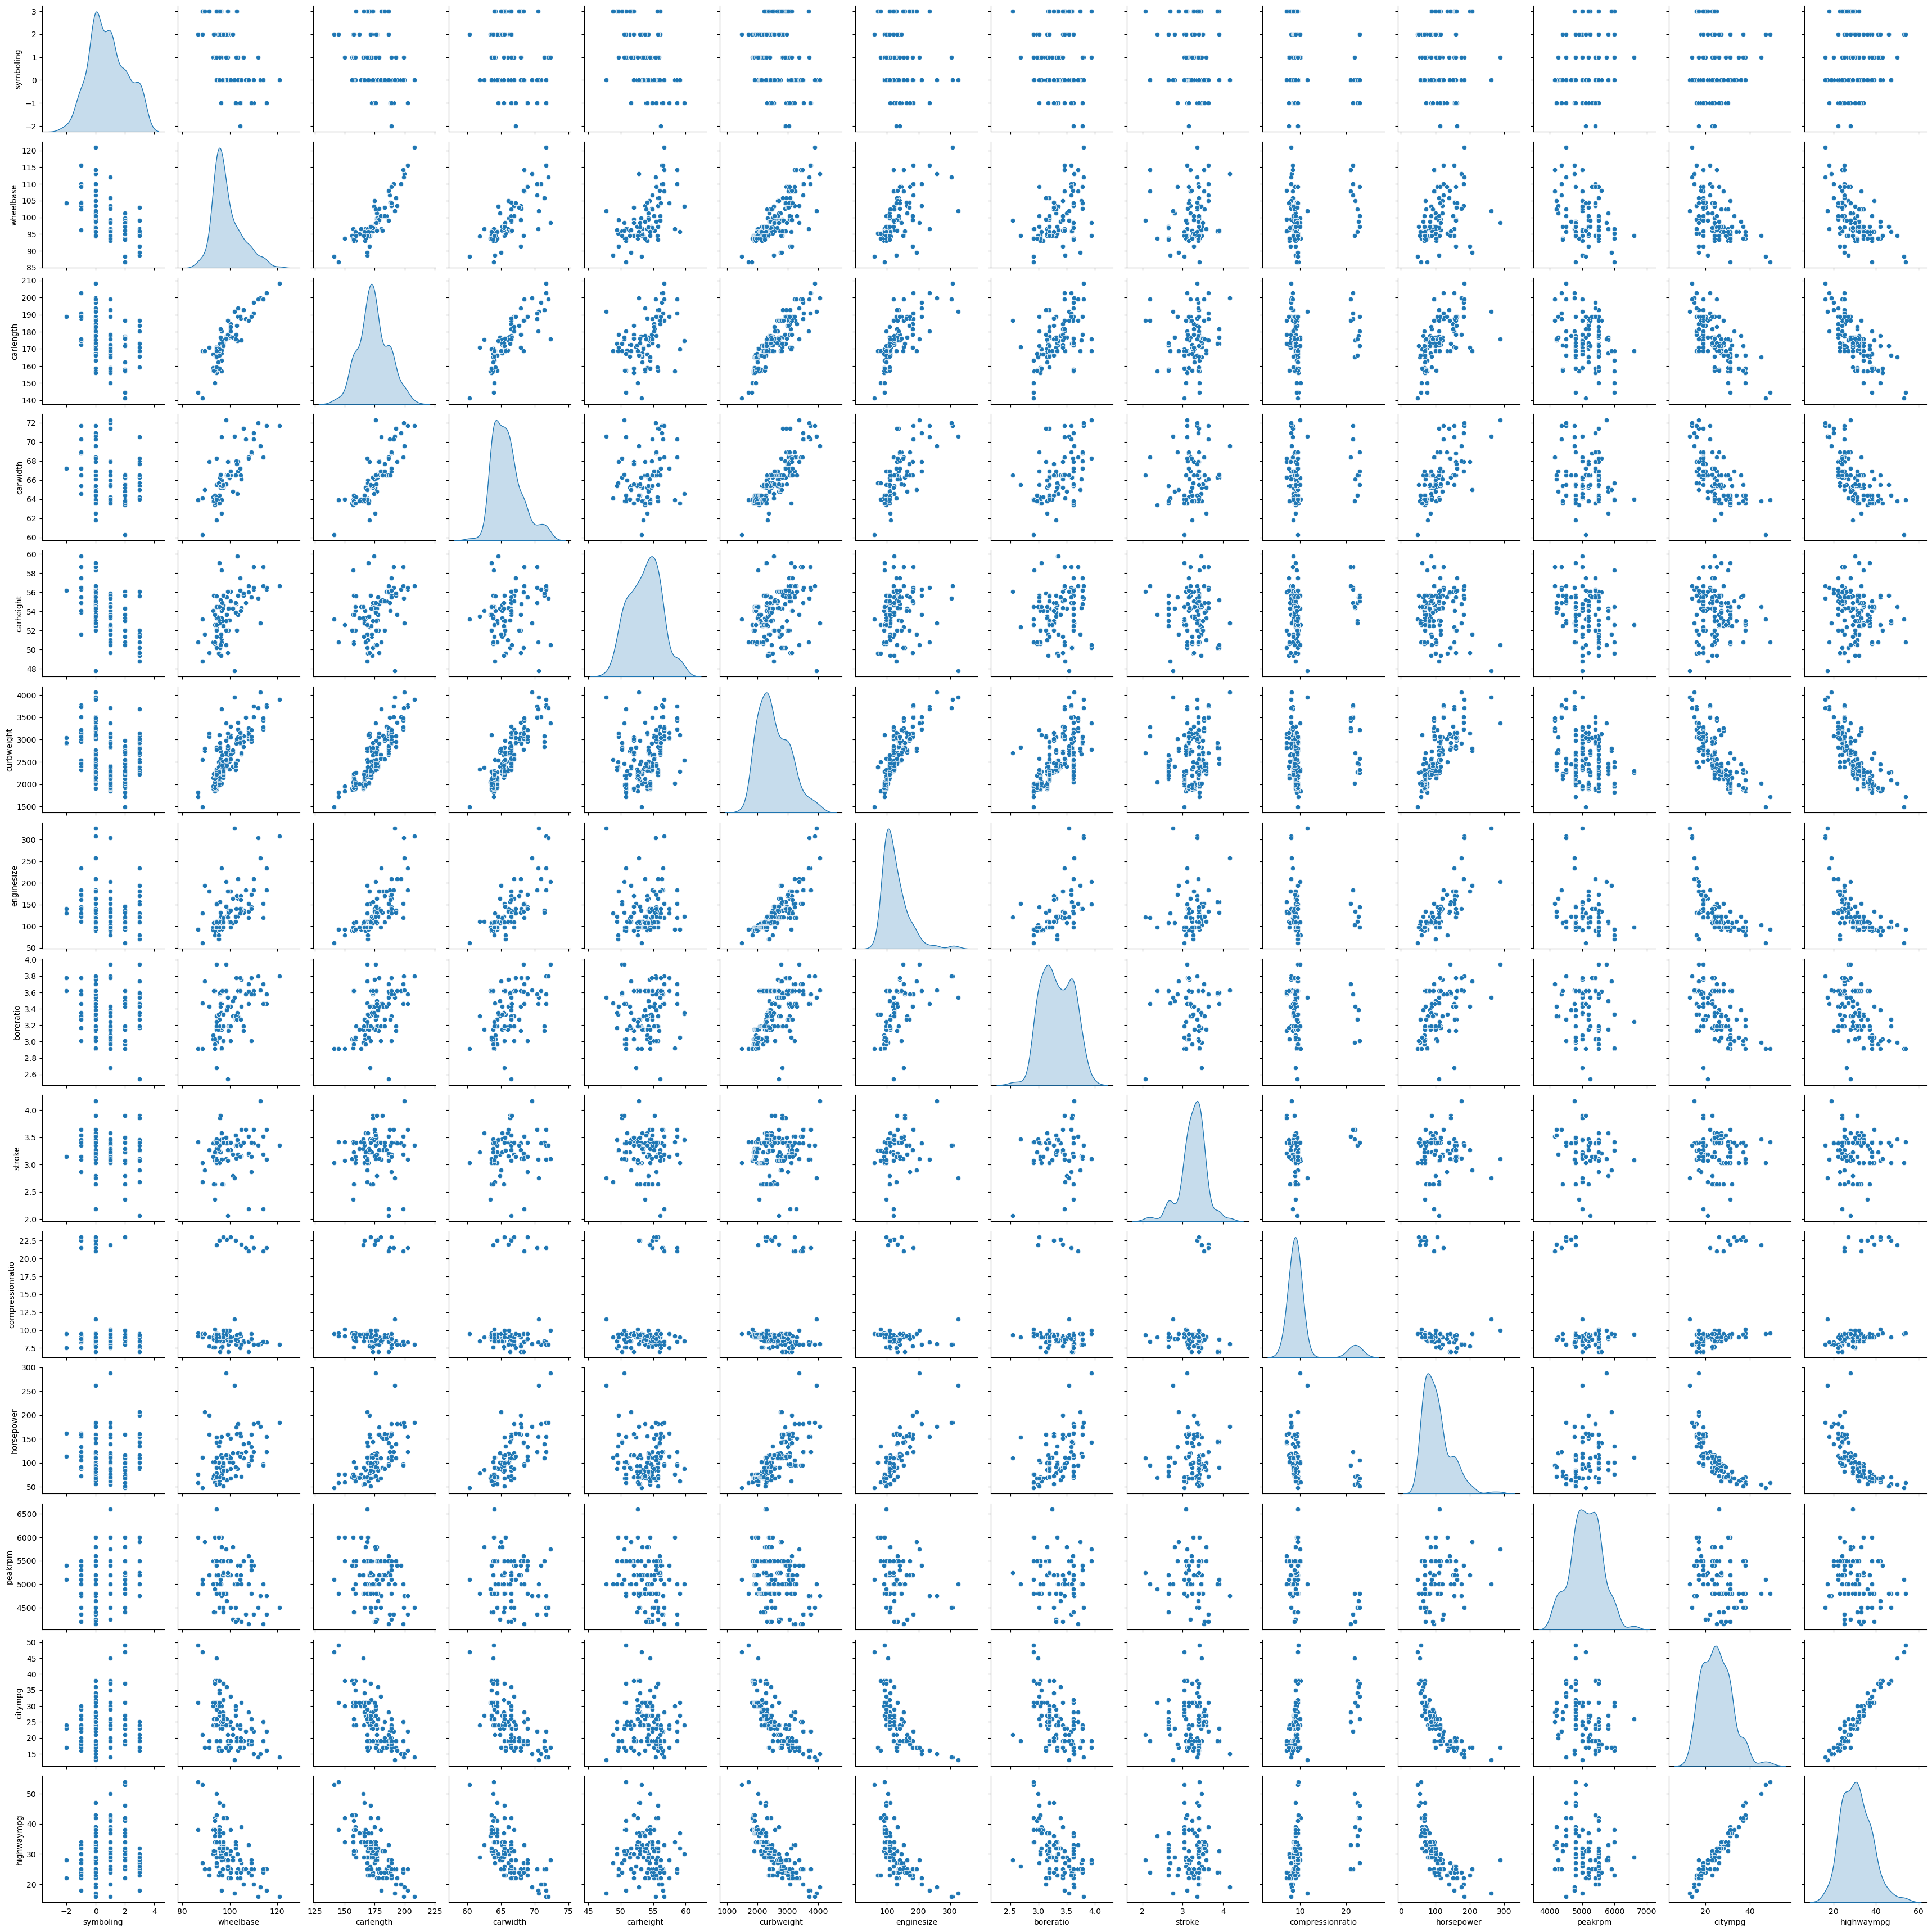

In [22]:
#importing seaborn for statistical plots
import seaborn as sns
car_df_attr = car_df.iloc[:,1:16]

sns.pairplot(car_df_attr , diag_kind = 'kde')

In [23]:
#did not consider other attributes such as number of doors, engine location etc due to low variance filter concept #pair plot shows clearly 
#some relation between price and height, curb weight, engine size, number of cylinders, horsepower and inversely related to mpg

#The data seems to be a mix of cars of high end and economy leading to a cluster of points at lower end in many of the 
#attributes, leading to a long tail in multiple attributes

#In this context a decision tree and linear regression could be a good start.

In [24]:
# Copy all the predictor variables into X dataframe. Since 'mpg' is dependent variable drop it
X = car_df.drop('price', axis=1)
X = X.drop('cylindernumber', axis=1)# Removing this column as we have created another column "cylinder" out of this

# Copy the 'price' column alone into the y dataframe. This is the target variable
y = car_df[['price']]



In [25]:
#Let us break the X and y dataframes into training set and test set. For this we will use
#Sklearn package's data splitting function which is based on random function

from sklearn.model_selection import train_test_split

In [26]:
# Split X and y into training and test set in 75:25 ratio

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [27]:
# invoke the LinearRegression function and find the bestfit model on training data
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression()

In [28]:
# Let us explore the coefficients for each of the independent attributes

for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for car_ID is -16.156310388989468
The coefficient for symboling is 10.49622708771363
The coefficient for wheelbase is 64.28367160281411
The coefficient for carlength is -122.66593858966652
The coefficient for carwidth is 779.50099574023
The coefficient for carheight is 401.10182101996213
The coefficient for curbweight is 0.24203049804928067
The coefficient for enginesize is 164.80309095899358
The coefficient for boreratio is -2970.119257350525
The coefficient for stroke is -4380.1376047062395
The coefficient for compressionratio is 354.16346340485956
The coefficient for horsepower is 45.29639907232107
The coefficient for peakrpm is 1.7813130480438701
The coefficient for citympg is -312.4895731267556
The coefficient for highwaympg is 182.6354038213634
The coefficient for cylinder is -1678.634545852396


In [29]:
# Let us check the intercept for the model

intercept = regression_model.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The intercept for our model is -48213.05768159673


In [30]:
# Model score - R2 or coeff of determinant
# R^2=1–RSS / TSS

regression_model.score(X_test, y_test)

0.8604478321659459

In [32]:
#How can the model peformance be improved?

#1.Always address outliers first. Linear models get easily impacted by outliers
#2.We noticed that on many attributes, there was a clump of data points on lower values and scattered on high values
#3.That is an indication of mixing data from two or more different segments. Maybe if we segregate the data we will get better results
#3.Not all attributes show a linear relation to price. Convert these attributes to quadratic form which may give a better fit on linear model

In [33]:
import statsmodels.formula.api as smf

# put the price column and the predictors together in on single array for OLS to work

#cars = pd.concat([y_train, X_train], axis=1, join='inner')
cars = pd.concat([y_train, X_train], axis=1)
cars.head()

,price,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,cylinder
14,24565.0,15,1,103.5,189.0,66.9,55.7,3055,164,3.31,3.19,9.0,121.0,4250.0,20.0,25.0,6
162,9258.0,163,0,95.7,166.3,64.4,52.8,2140,98,3.19,3.03,9.0,70.0,4800.0,28.0,34.0,4
59,8845.0,60,1,98.8,177.8,66.5,53.7,2385,122,3.39,3.39,8.6,84.0,4800.0,26.0,32.0,4
19,6295.0,20,1,94.5,155.9,63.6,52.0,1874,90,3.03,3.11,9.6,70.0,5400.0,38.0,43.0,4
177,11248.0,178,-1,102.4,175.6,66.5,53.9,2458,122,3.31,3.54,8.7,92.0,4200.0,27.0,32.0,4


In [45]:
lmcars = smf.ols(formula= 'price ~ symboling + wheelbase + curbweight +  enginesize + boreratio + stroke + compressionratio + horsepower + peakrpm + citympg + highwaympg  + cylinder', data=cars).fit()
#lmcars = smf.ols(formula= 'price ~ length+ enginesize + boreratio+ stroke + compressionratio + curbweight+ peakrpm + horsepower + cylinder', data=cars).fit()

In [46]:
lmcars.params

Intercept          -14601.616864
symboling             213.120006
wheelbase             171.978687
curbweight              1.000253
enginesize            152.325493
boreratio           -3283.741752
stroke              -3782.892609
compressionratio      323.315567
horsepower             41.240323
peakrpm                 2.021888
citympg              -279.338520
highwaympg            193.627201
cylinder            -1096.335153
dtype: float64

In [47]:
print(lmcars.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     63.89
Date:                Wed, 12 Apr 2023   Prob (F-statistic):           1.22e-50
Time:                        01:37:41   Log-Likelihood:                -1447.0
No. Observations:                 153   AIC:                             2920.
Df Residuals:                     140   BIC:                             2959.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         -1.46e+04   1.36e+04  